In [7]:
# load packages
library(car)
library(MASS)

In [10]:
# import data
# ant density and soil characteristic variables
ants <- read.csv('multiregdata_ants.csv')
str(ants)

'data.frame':	14 obs. of  5 variables:
 $ ant.dens        : num  51.4 72 53.2 83.2 57.4 66.5 98.3 74.8 92.2 97.9 ...
 $ soil.depth      : num  0.2 1.9 0.2 10.7 6.8 10.6 9.6 6.3 10.8 9.6 ...
 $ moisture.content: num  17.8 29.4 17 30.2 15.3 17.6 35.6 28.2 34.7 35.8 ...
 $ Nitrogen.C      : num  24.6 20.7 18.5 10.6 8.9 11.1 10.6 8.8 11.9 10.8 ...
 $ particle.size   : num  18.9 8 22.6 7.1 27.3 20.8 5.6 13.1 5.9 5.5 ...


# Assumptions:

1. EU are independent and random
2. Linear relationship
3. Normal data
4. IV cannot be highly correlated with each other (multicolinearity)

### Test for Normality

In [11]:
# p-value > 0.05, reject null, data is normal
shapiro.test(ants$ant.dens)


	Shapiro-Wilk normality test

data:  ants$ant.dens
W = 0.93028, p-value = 0.3079


### Test Multicolinearity

Look for correlation coefficients > 0.6.  If you have correlated variables, then you have a few options:

* Redefine variables (normalize, etc)
* Combine variables (e.g. PCA)
* Drop a correlated variable (perhaps one that is harder to measure, less meaningful)

In [18]:
# matrix of coefficients (r)
# look for r-values > 0.6
# danger: moisture.content/particle.size (0.996)
# danger: soil.depth/Nitrogen.C (0.634)
cor(ants[,2:5], method='spearman')

,soil.depth,moisture.content,Nitrogen.C,particle.size
soil.depth,1.0000000,0.30837079,-0.63395849,-0.34361317
moisture.content,0.3083708,1.00000000,-0.01540155,-0.99560440
Nitrogen.C,-0.6339585,-0.01540155,1.00000000,0.01980199
particle.size,-0.3436132,-0.99560440,0.01980199,1.00000000


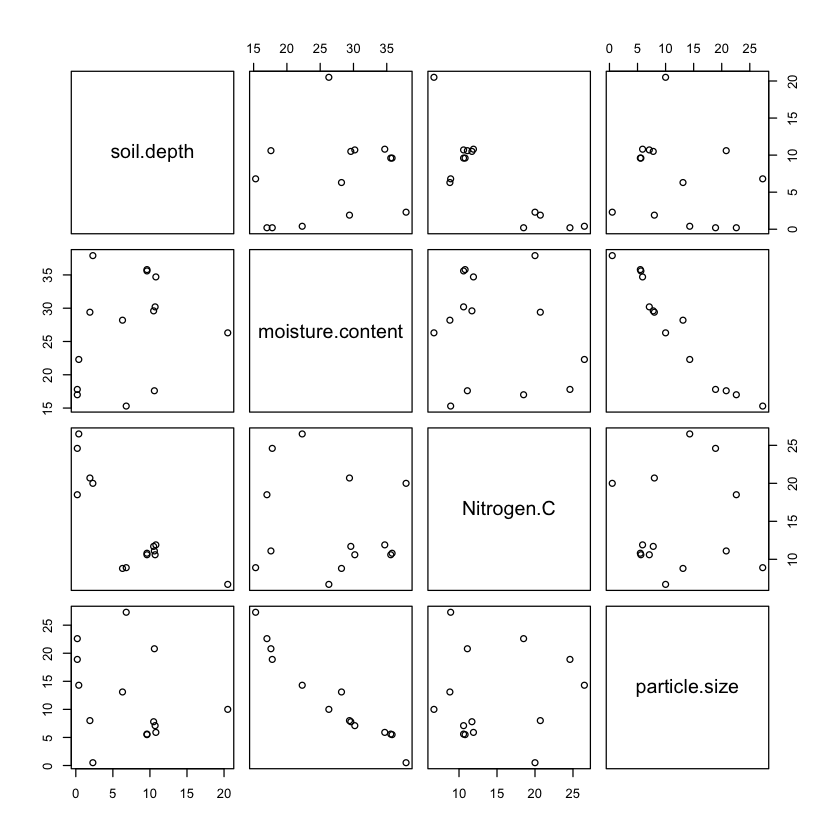

In [19]:
# visualize with paired plot
plot(ants[,2:5])

In [21]:
# example of not addressing correlated IVs:
ant_sdxm <- lm(ant.dens ~ 
               soil.depth + 
               moisture.content + 
               Nitrogen.C + 
               particle.size, 
               data=ants)

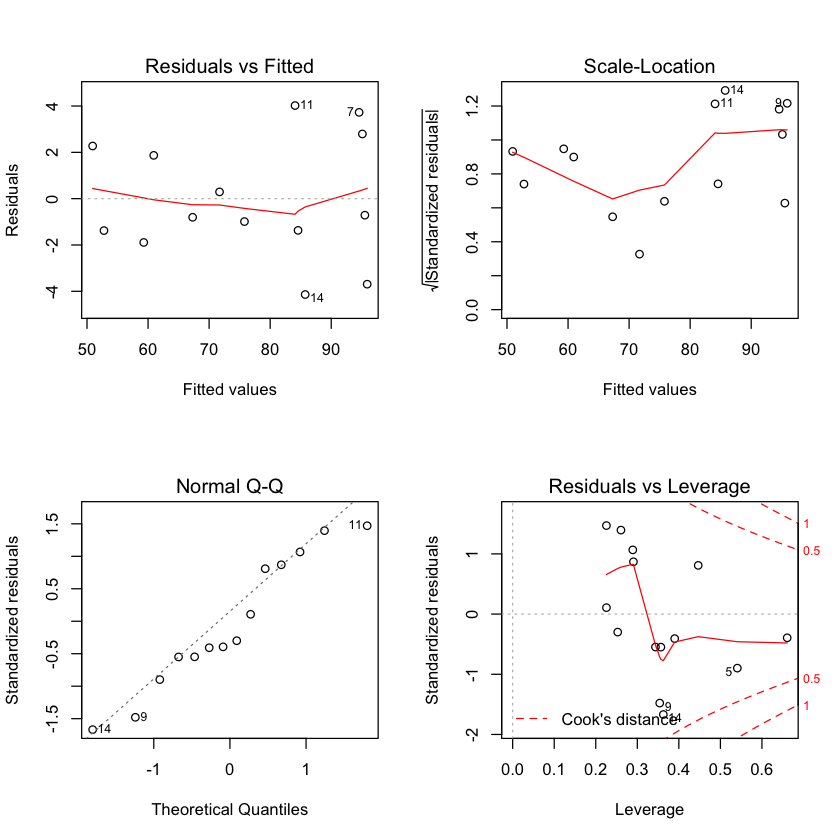

In [24]:
# plot evaluation
layout(matrix(c(1,2,3,4),2,2)) # like subplots in python
plot(ant_sdxm)

In [25]:
# test homoscedasticity
# null = equal variances
# p-value > 0.05, cannot reject null
ncvTest(ant_sdxm)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.557141, Df = 1, p = 0.21208